
# Datasets and initial configuration

Let's load a few data to fuel the examples

In [ ]:
from vega_datasets import data
dfw = data.seattle_weather()
dfr = data.la_riots()
dfe = data.iowa_electricity()

Let's set a few options for the display of the dataframes.

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', None)

# One step beyond: Seaborn

![](https://seaborn.pydata.org/_static/logo-wide-lightbg.svg)

We have already seen the flavor of the `Pandas` visualisations, but the Python ecosystem has many other possibilities.

[`Seaborn`](https://seaborn.pydata.org/) is a modern data visualization library specialised on statistical graphics. It is also based on [`Matplotlib`](https://matplotlib.org/).

In this notebook wi will explore some of the basic features and plots.


 Let's import the module and set some general properties and options.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(12, 6)})

we can check that the version is the correct one

In [ ]:
assert sns.__version__ >= '0.12'

And to get an idea of the kind of the charts `seaborne` produces we can execute the next cell code:

In [ ]:
sns.pairplot(dfw, hue="weather")

## Time

On many occasions data are related with time, so it's natural to see the evolution in time.

Let's see a `seaborn` function that we can use for that purpose.

### `lineplot`

Let's start with the dataframe `dfe`.

In [ ]:
dfe

We can plot the evolution on time of the data.

In `seaborne`, plotting functions do no apply to dataframe objects but rather functions receive data...

In [ ]:
sns.lineplot(data=dfe, x='year', y='net_generation')

As we already know the data we can imagine what `Seaborn` is doing:


> _the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate._ https://seaborn.pydata.org/generated/seaborn.lineplot.html

This could be useful if we want to study the aggregation of the `net_generation` values, but let's start looking at the evolution of the different sources.


In [ ]:
sns.lineplot(data=dfe, x='year', y='net_generation', hue='source')

We can use the description of the dataset to improve the chart adding units and other details.

In [ ]:
data.iowa_electricity.description

In [ ]:
ax = sns.lineplot(data=dfe, x='year', y='net_generation', hue='source')
ax.set(xlabel='Year',
       ylabel='MegaWatts/hour ',
       title="Iowa's increase of renewable energy")
ax.legend(['Fossil', 'Nuclear', 'Wind'])

So far we have been using data from the `vega_datasets` collection. But `Seaborn` has its own dataset collection.

We can check the names with this function:

In [ ]:
sns.get_dataset_names()

In particular, the [`fmri`](https://github.com/mwaskom/Waskom_CerebCortex_2017) contains interesting data on measures of brain activity.


In [ ]:
fmri = sns.load_dataset("fmri")
fmri

This dataset has many dimensions because we have different subjects, events, and regions, with signall values recorded along the time.

In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal")


We can focus on some subsets of the data, let's consider, for instance a concrete subject:

In [ ]:
fmri.query("subject == 's12'")

In [ ]:
fmri.event.unique()

In [ ]:
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri.query("subject=='s12'"))

This is the plot for one subject, maybe now it is interesting to aggregate for all subjects and to estimate the central tendency.

In [ ]:
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)


#### **Exercise**

Consider the dataframe `dfw` with meteorological data. And consider this transformation in which we add a new column with the info of the day of the year.

In [ ]:
dfw['day_of_year'] = dfw['date'].dt.dayofyear

With this new column we can aggregate the observations of the years 2012 to 2015. Experiment with the possibilities of the lineplot. Generate line plots for the temperatures along the year.  

In [ ]:
description = dfw.describe(include='all')
dfw

In [ ]:
sns.lineplot(x="day_of_year", y="temp_max",data=dfw)
sns.lineplot(x="day_of_year", y="temp_min",data=dfw)

             #hue="weather",# style="event",


The result should be something like this:

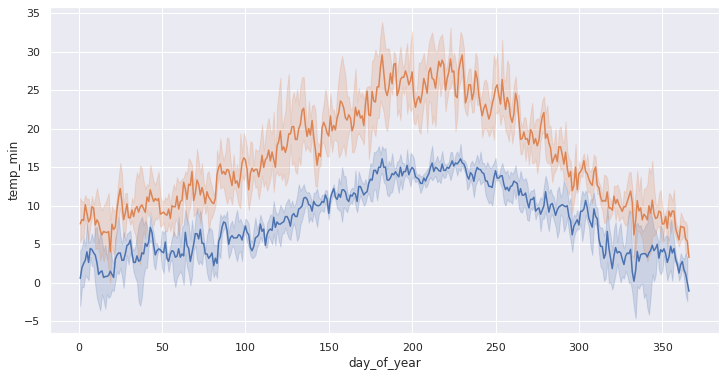

## Comparing

The human vision has a keen ability to perceive and  compare sizes. Several plot functions  transform data to be visually compared.  

### `countplot`

Is used to plot count values, and its frequently used with categorical variables.

In [ ]:
dfr.columns

In [ ]:
sns.countplot(data=dfr, x="race")

As we did before, we can modify the labels and add a title.

In [ ]:
ax = sns.countplot(data=dfr, x="race")
ax.set(xlabel='Ethnic group',
       ylabel='gentio',
       title="Dead persons in L.A. riots")

We can assign different colors:

In [ ]:
sns.countplot(data=dfr, x='race', hue='race')

Or we can use the color to introduce other variables in the dataset

In [ ]:
sns.countplot(data=dfr, x='race', hue='gender')

#### Exercise

Use the `countplot` to compare the differnt type of death in the dataframe `dfr`.

In [ ]:
sns.countplot(data=dfr, x='type', hue='gender')

### `barplot`

This function is also intended for comparing but it can only be used with numerical values. Let's consider the data on electricity production in `dfe`.

In [ ]:
dfe

In [ ]:
sns.barplot(data=dfe, x="source", y="net_generation")

We see not only a colored rectagle whose size reflects the central tendency of the values for each `source`, but also some measure of the uncertainty as a bar. We can choose different methods to compute the `errorbar`:
https://seaborn.pydata.org/tutorial/error_bars.html

In [ ]:
sns.barplot(data=dfe, x="source", y="net_generation", hue='source', estimator='median', errorbar='sd')

As we have already seen, can refine the charts introducing other variables...

In [ ]:
sns.barplot(data=dfr, x="race", y="age", hue='gender')

Or change the way we show the chart, for instance:

In [ ]:
sns.barplot(data=dfr, y="race", x="age", hue='gender', orient='h')

#### Exercise

In the `dfw` dataset, every day is tagged with one of these labels:

In [ ]:
dfw

Use a `barplot` to compare the temperatures for each of these labels.

In [ ]:
sns.barplot(data=dfw, y="temp_max", x="weather", hue='weather')
sns.barplot(data=dfw, y="temp_min", x="weather", hue='weather', palette="pastel")


## Distribution

For distribution plotting we are going to use the [penguins](https://github.com/allisonhorst/palmerpenguins) dataset.

In [ ]:
dfp = sns.load_dataset("penguins")
dfp

We can use a `pandas` function to better understand the data.

In [ ]:
dfp.value_counts(['species','island'])

### `boxplot`

Let's begin with a classic boxplot (or wiskers plot).

Consider, for instance, the plot for the weight of the penguins.  

In [ ]:
sns.boxplot(data=dfp, y="body_mass_g")

In [ ]:
sns.boxplot(data=dfp, x='species', y="body_mass_g")

We have not changed yet some basic properties: colors, labels... Let's show an example:

In [ ]:
ax = sns.boxplot(data=dfp, x='species', y="body_mass_g", palette='Set2')
ax.set(xlabel='Penguin', ylabel='Body mass (grams)', title='Weight differences among species')

#### **Exercise**


Write the code to produce the boxplots for the bill and flipper measures. Try different `x` variables. Customize the chart details.

In [ ]:
# Your code here


### `histplot`

Another classic chart for distribution are the histograms. As before, we can start with a very simple one.

In [ ]:
sns.histplot(data=dfp, x="body_mass_g")

And then, we use some of the parameters the function has...

In [ ]:
sns.histplot(data=dfp, x="body_mass_g", kde=True, bins=15)

In [ ]:
ax = sns.histplot(data=dfp, x="body_mass_g", kde=True, bins=15, color='green')
ax.set(xlabel='Weight (grams)', ylabel='')

Multiple histogramas can be plot together:

In [ ]:
sns.histplot(data=dfp, x="body_mass_g", hue='species')

To improve this multiple histogram, we can play with the order in which they are rendered, the colors, the alpha channel...

In [ ]:
sns.histplot(data=dfp, x="body_mass_g", hue='species',
             hue_order=['Chinstrap','Gentoo','Adelie'], palette='Set1', alpha=0.7, kde=True)

Or we could separate the different histograms in different plots...

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3)
sns.histplot(data=dfp.query('species == "Gentoo"'), x="body_mass_g", ax=axes[0])
sns.histplot(data=dfp.query('species == "Adelie"'), x="body_mass_g", ax=axes[1])
sns.histplot(data=dfp.query('species == "Chinstrap"'), x="body_mass_g", ax=axes[2])

We can improve the visualization by imposing common values in the x and y axis.

In [ ]:
dfp.body_mass_g.describe()

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3)
sns.histplot(data=dfp.query('species == "Gentoo"'), x="body_mass_g", ax=axes[0], binrange=(2000,7000))
sns.histplot(data=dfp.query('species == "Adelie"'), x="body_mass_g", ax=axes[1], binrange=(2000,7000))
sns.histplot(data=dfp.query('species == "Chinstrap"'), x="body_mass_g", ax=axes[2], binrange=(2000,7000))
for ax in axes:
   ax.set(ylim=(0,30))

Here we show another example with body mass distribution for two species:

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2)
sns.histplot(data=dfp.query('species == "Gentoo"'), x="body_mass_g", binrange=(2000,7000), color='red', ax=axes[0])
sns.histplot(data=dfp.query('species == "Adelie"'), x="body_mass_g", binrange=(2000,7000), color='green', ax=axes[1])

#### **Exercise**

Continue the work with the bill and flipper measures. Try different possibilities for the histograms. Change orientation, use other variables as hue, try the `element` parameter...

In [ ]:
sns.histplot(data=dfp, y="body_mass_g",
             #hue='species',
             element='poly',
             pmax = 0.5)

### `violinplot`

Anyway, in `Seaborn` there are other charts for density that somehow mix together the boxplot and histogram views.

In [ ]:
sns.violinplot(y=dfp.body_mass_g)

In [ ]:
sns.violinplot(data=dfp, y='body_mass_g', x='species', hue='sex')

In [ ]:
sns.violinplot(data=dfp, y='body_mass_g', x='species', hue='sex', split=True,  inner="quartile")

#### **Exercise**

Use the violinplot to improve your previous charts with boxplot and histplot for the bill and flipper measures in the penguins dataset. Change the order of the elements in the chart.  

In [ ]:
#bill_length_mm
#flipper_length_mm

sns.violinplot(data=dfp, y='flipper_length_mm', x='sex', hue='species',
               #split=True,  inner="quartile"
               hue_order=["Chinstrap","Gentoo", "Adelie"]
               )

### kdeplot

Other function useful to study the distribution is `kdeplot`, somehow we have already integrated the kde in the histograms, but we can produce charts with just the kernel density estimation.

Remember the multiple histogram for body mass we did above? This is a similar chart with just the kde.

In [ ]:
sns.kdeplot(data=dfp, x="body_mass_g", hue='species',
             hue_order=['Chinstrap','Gentoo','Adelie'], palette='Set1', alpha=0.7, fill=True)

We can even study the distribution of two variables in two dimensions

In [ ]:
sns.kdeplot(data=dfp, x='bill_length_mm', y='bill_depth_mm')

And, as usual, we can use other categories to refine the view.

In [ ]:
sns.kdeplot(data=dfp, x='bill_length_mm', y='bill_depth_mm', hue='species')

#### Exercise

Use an example of kde with two dimensions, for instance with the `dfw` dataset.

In [ ]:
sns.kdeplot(data=dfw, x='precipitation', y='wind',
            #hue='weather'
            )
#dfw

## Relations

### `scatterplot`

With the `scatterplot` function in `Seaborn` it is easy to show the relation between two variables and to add information of upto three more categorical variables.


Let's consider the dataset `dfr`

In [ ]:
dfr

We can draw the distribution of casualties around the city by using the geografical coordinates


In [ ]:
sns.scatterplot(data=dfr,
                x='longitude', y='latitude')

We start adding other information

In [ ]:
sns.scatterplot(data=dfr,
                x='longitude', y='latitude', hue='race')

We modify the size of the markers and add more categorical variables...

In [ ]:
sns.set(rc={'lines.markersize': 10.0})
sns.scatterplot(data=dfr,
                x='longitude', y='latitude',
                hue='race', style='gender')

Let's try now with the penguins dataset

In [ ]:
dfp = sns.load_dataset("penguins")
dfp

In [ ]:
sns.scatterplot(data=dfp, x='flipper_length_mm', y='bill_length_mm')

In [ ]:
sns.scatterplot(data=dfp, x='flipper_length_mm', y='bill_length_mm', hue='species', style='sex')

### `relplot`

On some occasions is better to separate the plots...`relplot` is a quite similar funcion that has this possilility.

In [ ]:
sns.relplot(data=dfr,
                x='longitude', y='latitude',
                hue='race', col='gender')

In [ ]:
sns.relplot(data=dfr,
                x='longitude', y='latitude',
                hue='gender', col='race')

#### **Exercise**

Use the dataset `dfw` and show the relations between the maximum and minimum temperatures. Use the weather variable to add more information. Try also to produce separate plots.

In [ ]:
dfw

In [ ]:
sns.scatterplot(data=dfw, x='temp_max', y='temp_min', hue='weather')

# Python

The integration of `python` code and seaborne allows to automatize the creation of charts and also to produce interative tools to study the data. Here there are a couple of examples. Try to understand the code.

## Multiple plots

In [ ]:
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
dfp = sns.load_dataset("penguins")

for c in [c for c in dfp.columns if is_numeric_dtype(dfp[c].dtype)]:
  if c!='species':
    sns.boxplot(data=dfp, x='species', y=c)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 4)
from pandas.api.types import is_numeric_dtype
cont = 0
for c in [c for c in dfp.columns if is_numeric_dtype(dfp[c].dtype)]:
  if c!='species':
    sns.boxplot(data=dfp, x='species', y=c, ax=axes[cont])
    cont += 1
plt.show()

## Widgets

In [ ]:
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")

def eda_widget(sex, island, species):
    # Filter the dataset based on the selected widget values
    df = penguins[(penguins['sex'] == sex) & (penguins['island'] == island) & (penguins['species'] == species)]

    # Check there are data in the selection
    num_rows = len(df)
    if num_rows == 0:
      print('No data in the selection')
    else:
      # Create some plots
      fig, axs = plt.subplots(ncols=2, figsize=(14, 4))
      sns.histplot(data=df, x='body_mass_g', kde=True, ax=axs[0])
      axs[0].set_title('Distribution of body mass by sex')
      sns.scatterplot(data=df, x='bill_depth_mm', y='flipper_length_mm', hue='species', ax=axs[1])
      axs[1].set_title('Scatter plot of bill depth vs. flipper length by species')
      plt.show()

      # Display the summary statistics
      mean_body_mass = df['body_mass_g'].mean()
      median_body_mass = df['body_mass_g'].median()
      print(f"Number of penguins: {num_rows}")
      print(f"Mean body mass: {mean_body_mass:.2f} g")
      print(f"Median body mass: {median_body_mass:.2f} g")

sex_widget = widgets.Dropdown(options=['Male', 'Female'], description='Sex:')
island_widget = widgets.Dropdown(options=['Biscoe', 'Dream', 'Torgersen'], description='Island:')
species_widget = widgets.Dropdown(options=['Adelie', 'Chinstrap', 'Gentoo'], description='Species:')
widgets.interact(eda_widget, sex=sex_widget, island=island_widget, species=species_widget);

<hr>
<hr>
Carlos Gregorio Rodríguez

Universidad Complutense de Madrid

<img src="https://static0.makeuseofimages.com/wordpress/wp-content/uploads/2019/11/CC-BY-NC-License.png" alt="cc by nc" width="200"/>

https://creativecommons.org/licenses/by-nc/4.0/